## Have the notebook in the same location as masterfile. Import the necessary packages and run

In [1]:
import pandas as pd
from lxml import html
import requests
import urllib
import os
from io import BytesIO
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from gensim.models.doc2vec import Doc2Vec , TaggedDocument
# from gensim.test.utils import common_texts
from sklearn import utils
from configparser import ConfigParser
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from empath import Empath
lexicon = Empath()
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from configparser import ConfigParser
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [ ]:
cwd = os.getcwd()

datapoints = pd.read_csv(r"master996.csv",sep=';',engine='python')

In [ ]:
rowcount = len(datapoints.axes[0])
data = []
dataclass = []
for i in range(0, rowcount):
    bookid = datapoints.iloc[i, 1]
    bookid_split = bookid.split('.')
    dataclass.append(datapoints.iloc[i, 2])
    path = "file:///" + cwd + "\Gutenberg_19th_century_English_Fiction/" + bookid_split[0] + "-content.html"
    data.append(urllib.request.urlopen(path).read())

In [2]:
# prop = ConfigParser()

# #Reading the configuration file

# prop.read("D:\Workspace\OVGU\ATiML\Project\Gutenberg_English_Fiction_1k\src\properties.ini")    


# os.chdir(prop['ProjectDirectory']['filepath'])  ##### TO SET THE WORKING DIRECTORY





# os.getcwd()


'D:\\Workspace\\OVGU\\ATiML\\Project\\Gutenberg_English_Fiction_1k'

In [3]:
# datapoints = pd.read_csv(prop['MetaDataDirectory']['filepath']+prop['MetaDataDirectory']['rawData'],sep=';',engine='python')


In [4]:
# bookpath = prop['DatafileDirectory']['filepath']
# rowcount = len(datapoints.axes[0])
# data = []
# dataclass = []
# for i in range (rowcount):
#     bookid = datapoints.iloc[i,1]
#     bookid_split = bookid.split('.')
#     dataclass.append(datapoints.iloc[i,2])
#     path = "file:///" +bookpath +bookid_split[0] +"-content.html"
#     data.append(urllib.request.urlopen(path).read())

In [5]:
# read master996
# datapoints = pd.read_csv(r"C:\Users\Manjusha Pattadkal\Documents\AML\Gutenberg_English_Fiction_1k\master996.csv",sep=';',engine='python')

In [6]:
# #get books content and bookid
# rowcount = len(datapoints.axes[0])
# data = []
# dataclass = []
# author = []
# for i in range (0,rowcount):
#     bookid = datapoints.iloc[i,1]
#     bookid_split = bookid.split('.')
#     dataclass.append(datapoints.iloc[i,2])
#     path = r"file:///C:\Users\Manjusha Pattadkal\Documents\AML\Gutenberg_English_Fiction_1k\Gutenberg_19th_century_English_Fiction/" +bookid_split[0] +"-content.html"
#     data.append(urllib.request.urlopen(path).read())
#     author.append(datapoints.iloc[i,3])

In [5]:
# class numbering
tags_index = {'Detective and Mystery': 1 , 'Literary': 2, 'Western Stories': 3, 'Ghost and Horror': 4, 'Christmas Stories': 5, 'Love and Romance': 6, 'Sea and Adventure': 7, 'Allegories': 8, 'Humorous and Wit and Satire': 9}

In [6]:
#Preprocess function
def preprocessing(String ): #default value is always true for stemming and stopwords
    
    '''
    This function is used for preprocessing
    - Tokenization
    - Stemming
    - Stop Words
        
    '''
    
    tokens = nltk.word_tokenize(String)
    token = [word for word in tokens if word.isalpha()]
 #   token = [token.remove(word) for word in token if (word.isalpha())== False]
    

    
    stop_words = set(stopwords.words('english'))
    influentialwords = []
    stemwords = []
    for w in token:
        if w not in stop_words: 
            influentialwords.append(w)
    stopwords_string = " ".join(influentialwords)
    return stopwords_string

    


In [7]:
#call preprocessing function
data_preprocess = []

for i in range (0,rowcount):
    data_preprocess.append(preprocessing(str(data[i])))

#remove 1 len word

for i in range (0,rowcount):
    data_preprocess[i]  = ' '.join([w for w in str(data_preprocess[i]).split() if len(w)>1])

In [8]:
# remove data with empty content
df = pd.DataFrame(data_preprocess)  
#class_df = pd.DataFrame(dataclass)
df['1'] = dataclass

df[0].replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)
rowcount = len(df.axes[0])
data_preprocess = df.iloc[:,0]
dataclass = df.iloc[:,1]

In [9]:
print(dataclass_num[0])

NameError: name 'dataclass_num' is not defined

In [10]:
## Split into train and test
dataclass_num = [tags_index.get(item,item)  for item in dataclass]
dataclass_num = np.array(dataclass_num)
#print(dataclass_num[0])
X_train, X_test, y_train, y_test = train_test_split(data_preprocess, dataclass_num, test_size=0.25, shuffle=True, stratify= dataclass_num)


In [11]:
#length for train n test set
train_rowcount = len(X_train)
test_rowcount = len(X_test)

In [12]:
#convert them to list for empath
X_train=X_train.tolist()
X_test=X_test.values.tolist()

In [13]:
#empath function
def empathanalyze(book,count):
    a =lexicon.analyze(book[0])
    df1 = pd.DataFrame([a["hate"],a["cheerfulness"],a["aggression"],a["envy"],a["crime"],a["attractive"],a["masculine"],a["prison"],a["health"],a["pride"],a["dispute"],a["nervousness"],a["suffering"],a["ridicule"],a["computer"],a["optimism"],a["divine"],a["sexual"],a["fear"],a["childish"],a["religion"],a["internet"],a["surprise"],a["worship"],a["medieval"],a["death"],a["healing"],a["politics"],a["celebration"],a["violence"],a["love"],a["ancient"],a["urban"],a["science"],a["youth"],a["fun"],a["white_collar_job"],a["technology"],a["philosophy"],a["monster"],a["negative_emotion"],a["positive_emotion"],a["weapon"],a["feminine"],a["technology"],a["philosophy"],a["monster"]]).transpose()
 


    for i in range (1,count):
        a =lexicon.analyze(book[i])
        df = pd.DataFrame([a["hate"],a["cheerfulness"],a["aggression"],a["envy"],a["crime"],a["attractive"],a["masculine"],a["prison"],a["health"],a["pride"],a["dispute"],a["nervousness"],a["suffering"],a["ridicule"],a["computer"],a["optimism"],a["divine"],a["sexual"],a["fear"],a["childish"],a["religion"],a["internet"],a["surprise"],a["worship"],a["medieval"],a["death"],a["healing"],a["politics"],a["celebration"],a["violence"],a["love"],a["ancient"],a["urban"],a["science"],a["youth"],a["fun"],a["white_collar_job"],a["technology"],a["philosophy"],a["monster"],a["negative_emotion"],a["positive_emotion"],a["weapon"],a["feminine"],a["technology"],a["philosophy"],a["monster"]]).transpose()
        df1=df1.append(df,ignore_index=True)
        
    return df1
    
    
    

  

In [14]:
df1 = empathanalyze(X_train,train_rowcount)
df2 = empathanalyze(X_test,test_rowcount)

In [15]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(X_train)


In [16]:
feature_names = np.array(vectorizer.get_feature_names())

In [17]:
print (len(feature_names))

130136


In [18]:
def get_top_tf_idf_words(response, top_n=1000):
    sorted_nzs = np.argsort(response.data)[:-(top_n+1):-1]
    return feature_names[response.indices[sorted_nzs]]

In [19]:
#get each class in one list
def oneclass(count,bookclass,data,dataclass):
    together = []
    for i in range(0,count):
        if dataclass[i]==bookclass:
            together.append(data[i])
    return together

In [20]:
#combine data with same classes
dect = oneclass(train_rowcount,1,X_train,y_train)
lit = oneclass(train_rowcount,2,X_train,y_train)
WS = oneclass(train_rowcount,3,X_train,y_train)
GH = oneclass(train_rowcount,4,X_train,y_train)
ChristSto = oneclass(train_rowcount,5,X_train,y_train)
Lovero = oneclass(train_rowcount,6,X_train,y_train)
SeaA = oneclass(train_rowcount,7,X_train,y_train)
Alleg = oneclass(train_rowcount,8,X_train,y_train)
humor = oneclass(train_rowcount,9,X_train,y_train)

In [21]:
print (len(lit))

594


In [22]:
# # outdated
# def gettop(classlist):
#     words=[]
#     vect = vectorizer.transform(classlist)
#     words.append([get_top_tf_idf_words(response,1000) for response in vect])
#     return words

In [23]:
def gettop(classlist):
    words=[]
    vect = vectorizer.transform(classlist)
    words.append([get_top_tf_idf_words(vect,1000)])
    return words

In [24]:
#top 1000 words for all classes
detmys_wrd = gettop(dect)
lit_wrd = gettop(lit)
ws_wrd = gettop(WS)
gh_wrd = gettop(GH)
cs_wrd = gettop(ChristSto)
lr_wrd = gettop(Lovero)
sa_wrd = gettop(SeaA)
al_wrd = gettop(Alleg)
hws_wrd = gettop(humor)

In [25]:
print(len(detmys_wrds))

NameError: name 'detmys_wrds' is not defined

In [26]:
detmys_wrds = []
lit_wrds = []
ws_wrds = []
gh_wrds = []
cs_wrds = []
lr_wrds = []
sa_wrds = []
al_wrds = []
hws_wrds = []

In [27]:
for i in range(len(detmys_wrd)):
    for j in range(len(detmys_wrd[i])):
        for k in range(len(detmys_wrd[i][j])):
            detmys_wrds.append(detmys_wrd[i][j][k])

for i in range(len(lit_wrd)):
    for j in range(len(lit_wrd[i])):
        for k in range(len(lit_wrd[i][j])):
            lit_wrds.append(lit_wrd[i][j][k])
for i in range(len(ws_wrd)):
    for j in range(len(ws_wrd[i])):
        for k in range(len(ws_wrd[i][j])):
            ws_wrds.append(ws_wrd[i][j][k])
for i in range(len(gh_wrd)):
    for j in range(len(gh_wrd[i])):
        for k in range(len(gh_wrd[i][j])):
            gh_wrds.append(gh_wrd[i][j][k])
for i in range(len(cs_wrd)):
    for j in range(len(cs_wrd[i])):
        for k in range(len(cs_wrd[i][j])):
                cs_wrds.append(cs_wrd[i][j][k])
for i in range(len(lr_wrd)):
    for j in range(len(lr_wrd[i])):
        for k in range(len(lr_wrd[i][j])):
            lr_wrds.append(lr_wrd[i][j][k])

for i in range(len(sa_wrd)):
    for j in range(len(sa_wrd[i])):
        for k in range(len(sa_wrd[i][j])):
            sa_wrds.append(sa_wrd[i][j][k])

for i in range(len(al_wrd)):
    for j in range(len(al_wrd[i])):
        for k in range(len(al_wrd[i][j])):
            al_wrds.append(al_wrd[i][j][k])

for i in range(len(hws_wrd)):
    for j in range(len(hws_wrd[i])):
        for k in range(len(hws_wrd[i][j])):
            hws_wrds.append(hws_wrd[i][j][k])

In [28]:
tag_data =  [TaggedDocument(d.split(), [i]) for i, d in enumerate(X_train)]

glb_lst = []
for i in range(len(tag_data)):
    lcl_lst = []
    lcl_lst.clear()
    lcl_lst.append(round(len(set(tag_data[i][0])& set(detmys_wrds))/len(detmys_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0])& set(lit_wrds))/len(lit_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(ws_wrds)) / len(ws_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(gh_wrds)) / len(gh_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(cs_wrds)) / len(cs_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(lr_wrds)) / len(lr_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(sa_wrds)) / len(sa_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(al_wrds)) / len(al_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(hws_wrds)) / len(hws_wrds),6))
    glb_lst.append(lcl_lst)

In [29]:
tag_data =  [TaggedDocument(d.split(), [i]) for i, d in enumerate(X_test)]

glb_lst_test = []
for i in range(len(tag_data)):
    lcl_lst = []
    lcl_lst.clear()
    lcl_lst.append(round(len(set(tag_data[i][0])& set(detmys_wrds))/len(detmys_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0])& set(lit_wrds))/len(lit_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(ws_wrds)) / len(ws_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(gh_wrds)) / len(gh_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(cs_wrds)) / len(cs_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(lr_wrds)) / len(lr_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(sa_wrds)) / len(sa_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(al_wrds)) / len(al_wrds),6))
    lcl_lst.append(round(len(set(tag_data[i][0]) & set(hws_wrds)) / len(hws_wrds),6))
    glb_lst_test.append(lcl_lst)

In [30]:
print(len(l_col))

NameError: name 'l_col' is not defined

In [31]:
l_col = []
for i in range (0,9):
    l_col = []
    for j in range (0,train_rowcount):
        l_col.append(glb_lst[j][i])
    df1[str(48+i)] = l_col

In [32]:
l_col=[]
for j in range (0,train_rowcount):
        l_col.append(glb_lst[j][0])
print(len(l_col))

745


In [33]:
l_col = []
for i in range (0,9):
    l_col = []
    for j in range (0,test_rowcount):
        l_col.append( glb_lst_test[j][i])
    df2[str(48+i)] = l_col

In [34]:
print(df2)

         0      1      2      3      4      5      6      7      8      9  \
0     94.0  117.0   61.0   24.0   36.0  123.0   73.0   21.0   29.0   88.0   
1    334.0  224.0  325.0   87.0  124.0  208.0  647.0  105.0   64.0  207.0   
2    202.0  305.0  108.0   64.0   47.0  332.0  206.0   42.0  112.0  129.0   
3    306.0  266.0  305.0  116.0  239.0  327.0  389.0  187.0  226.0  184.0   
4     13.0   11.0   13.0    1.0    3.0   21.0   17.0    3.0    7.0    3.0   
5     39.0   31.0   40.0    8.0    7.0   37.0   60.0   18.0   52.0   17.0   
6    239.0  308.0  191.0   74.0   78.0  482.0  634.0   99.0   82.0  177.0   
7    371.0  363.0  280.0  119.0  260.0  222.0  465.0  205.0  198.0  348.0   
8    595.0  231.0  366.0  177.0   67.0  395.0  176.0   26.0   23.0  119.0   
9    302.0  389.0  173.0   86.0  109.0  251.0  161.0  133.0  124.0  230.0   
10   100.0  146.0   78.0   37.0   22.0   92.0  152.0   29.0   69.0   64.0   
11    53.0   37.0   55.0   29.0   34.0   27.0   65.0   41.0   14.0   15.0   

##  Binary Classification

In [35]:
y_train_1 = []
for i in range (0,train_rowcount):
    if y_train[i]!=2:
        y_train_1.append(1)
    else:
        y_train_1.append(2)

In [36]:
y_test_1 = []
for i in range (0,test_rowcount):
    if y_test[i]!=2:
        y_test_1.append(1)
    else:
        y_test_1.append(2)

In [37]:
print(y_test_1)

[2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2]


In [38]:
scaler = MaxAbsScaler()

df1 = scaler.fit_transform(df1)
df2 = scaler.fit_transform(df2)

### Binary SVM

In [41]:

################## SVM HYPERPARAMETER


def support_vector_machine_hyperparameter_tuning(X_train,y_train):
    print("SVM for predicting rating")   

    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf','sigmoid','poly'],'degree':[5,6,7],'gamma': [0.1,0.01],
                         'C': [10,15,20,25,30], 'class_weight':["balanced"],'decision_function_shape':['ovo']}
                       ]
    
    scores = ['accuracy','f1_weighted','recall_weighted']
#    scores = ['accuracy']
    
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
    
        clf = GridSearchCV(SVC(), tuned_parameters, cv=5,n_jobs=-1,return_train_score = True,
                           scoring='%s' % score)
        clf.fit(X_train, y_train)
    
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means_test = clf.cv_results_['mean_test_score']
        stds_test = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']
        for mean_train, std_train,mean_test,std_test, params in zip(means_train,stds_train,means_test, stds_test, clf.cv_results_['params']):
            print("Train scores %0.3f (+/-%0.03f) Test scores %0.3f (+/-%0.03f) for %r"
                  % (mean_train, std_train * 2, mean_test, std_test * 2, params))
        print()
        print()
        
        


In [44]:
support_vector_machine_hyperparameter_tuning(df1,y_train_1)

SVM for predicting rating
# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

Train scores 0.850 (+/-0.011) Test scores 0.812 (+/-0.082) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Train scores 0.597 (+/-0.034) Test scores 0.583 (+/-0.045) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'sigmoid'}
Train scores 0.843 (+/-0.006) Test scores 0.812 (+/-0.082) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}
Train scores 0.818 (+/-0.023) Test scores 0.803 (+/-0.112) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train scores 0.

Best parameters set found on development set:

{'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

Train scores 0.855 (+/-0.010) Test scores 0.818 (+/-0.073) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Train scores 0.637 (+/-0.030) Test scores 0.623 (+/-0.041) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'sigmoid'}
Train scores 0.846 (+/-0.005) Test scores 0.817 (+/-0.074) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}
Train scores 0.825 (+/-0.020) Test scores 0.811 (+/-0.099) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train scores 0.810 (+/-0.041) Test scores 0.797 (+/-0.088) for {'C': 10, 'class_w

Best parameters set found on development set:

{'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

Train scores 0.850 (+/-0.011) Test scores 0.812 (+/-0.082) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Train scores 0.597 (+/-0.034) Test scores 0.583 (+/-0.045) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'sigmoid'}
Train scores 0.843 (+/-0.006) Test scores 0.812 (+/-0.082) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}
Train scores 0.818 (+/-0.023) Test scores 0.803 (+/-0.112) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train scores 0.799 (+/-0.050) Test scores 0.784 (+/-0.100) for {'C': 10, 'class_w

In [39]:
from sklearn.metrics import cohen_kappa_score
# pred = clf.predict(df2)

# cohen_kappa_score(y_test, pred)

def benchmark(name,clf):
    print('_' * 80)

    print(clf)
    
    clf.fit(df1, y_train_1)

    pred = clf.predict(df2)
    print("Predictions")
    print(pred)
    
    
    train_score = metrics.accuracy_score(y_train_1, clf.predict(df1))
    print("Train accuracy:   %0.5f" % train_score)
    score = metrics.accuracy_score(y_test_1, pred)
    print("Test accuracy:   %0.5f" % score)
    
    
    train_rscore = metrics.recall_score(y_train_1, clf.predict(df1),average="micro")
    print("Train recall:   %0.5f" % train_rscore)
    rscore = metrics.recall_score(y_test_1, pred,average="micro")
    print("Test recall:   %0.5f" % rscore)
    
    cohen_score = cohen_kappa_score(y_test_1, pred)
    print("Cohen kappa score:   %0.5f" % cohen_score)
    
    u = np.unique(y_test_1)
    print("classification report:")
    print(metrics.classification_report(y_test_1, pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test_1, pred))

    print()
    
    metrics.plot_confusion_matrix(clf,df2, y_test_1,values_format='g')  
    plt.show()
    
    return clf
#     dimensions = X_train.shape[1]
#     clf_descr = str(clf).split('(')[0]
#     clf_param= clf.get_params


Support Vector Machines
________________________________________________________________________________
SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovo', degree=5, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Predictions
[2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 2 2
 1 1 2 1 1 2 1 2 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 1 2 2
 1 2 1 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 1 1 1 1 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2
 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 1 1 1 1 2 2 1 2 2 1 1 2 2 2 1 2 2
 2 2 2 1 2 1 1 1 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2
 1 1 1 2 2 2 1 2 1 2 2 1 2 2 1 1 2 2 2 1 2 2 1 1 2 1 2]
Train accuracy:   0.82819
Test accuracy:   0.72691
Train recall:   0.82819
Test recall:   0.72691
Cohen kappa score:   0.34326

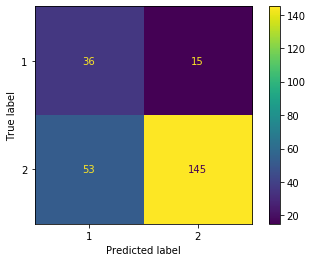

In [66]:

# {'C': 5, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}
    
print("Support Vector Machines")
clf = benchmark("SVM",SVC(C=10, kernel='rbf',gamma=0.1,class_weight="balanced",decision_function_shape="ovo",degree=5))

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
metrics.plot_confusion_matrix(clf, df2, y_test_1)  
plt.show()

<Figure size 640x480 with 2 Axes>

In [67]:
y_predict = clf.predict(df2)

print(metrics.f1_score(y_test_1,y_predict,average='weighted'))

0.7494764372734355


In [68]:
print(y_predict)

[2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 2 2
 1 1 2 1 1 2 1 2 2 1 1 2 2 2 1 2 2 2 2 2 1 2 2 2 1 1 1 2 1 2 1 2 2 2 1 2 2
 1 2 1 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1 1 2 1 1 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 1 1 1 1 2 2 1 2 1 2 2 1 2 2 2 2 2 2 2
 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 1 1 1 1 2 2 1 2 2 1 1 2 2 2 1 2 2
 2 2 2 1 2 1 1 1 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 2 2
 1 1 1 2 2 2 1 2 1 2 2 1 2 2 1 1 2 2 2 1 2 2 1 1 2 1 2]


### Binary RF

In [67]:
def rf_hyperparameter_tuning(X_train,y_train):
    print("RandomForest for predicting rating")   

    # Set the parameters by cross-validation

    tuned_parameters = [{'n_estimators': [200,250,300,350], 'criterion':["gini","entropy"],'max_features':["sqrt", "log2"],
                        'min_samples_leaf':[1,2,3],'n_jobs':[-1]}
                   ]
    scores = ['f1_weighted','recall_weighted']
    
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
    
        clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,n_jobs=-1,return_train_score = True,
                           scoring='%s' % score)
        clf.fit(X_train, y_train)
    
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means_test = clf.cv_results_['mean_test_score']
        stds_test = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']
        for mean_train, std_train,mean_test,std_test, params in zip(means_train,stds_train,means_test, stds_test, clf.cv_results_['params']):
            print("Train scores %0.3f (+/-%0.03f) Test scores %0.3f (+/-%0.03f) for %r"
                  % (mean_train, std_train * 2, mean_test, std_test * 2, params))
        print()
        print()

In [68]:
rf_hyperparameter_tuning(df1,y_train_1)

RandomForest for predicting rating
# Tuning hyper-parameters for f1_weighted

Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 250, 'n_jobs': -1}

Grid scores on development set:

Train scores 1.000 (+/-0.000) Test scores 0.822 (+/-0.063) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.828 (+/-0.069) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 250, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.821 (+/-0.056) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.825 (+/-0.049) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350, 'n_jobs': -1}
Train scores 0.984 (+/-0.005) Test scores 0.824 (+/-0.042) for {'crit

Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 300, 'n_jobs': -1}

Grid scores on development set:

Train scores 1.000 (+/-0.000) Test scores 0.851 (+/-0.044) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.846 (+/-0.038) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 250, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.844 (+/-0.040) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.847 (+/-0.052) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350, 'n_jobs': -1}
Train scores 0.987 (+/-0.003) Test scores 0.850 (+/-0.039) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators':

RandomForest Classification
________________________________________________________________________________
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Predictions
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 2

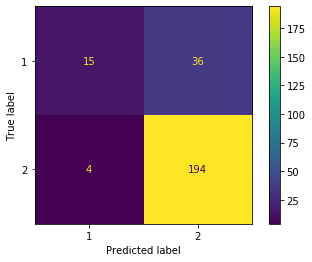

In [41]:

# {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200, 'n_jobs': -1}
    
print("RandomForest Classification")
clf = benchmark("RF",RandomForestClassifier(min_samples_leaf=2, criterion='gini',n_estimators=250,max_features="sqrt",n_jobs=-1))

In [44]:
y_predict = clf.predict(df2)

print(metrics.f1_score(y_test_1,y_predict,average='weighted'))

0.8086444576704683


In [99]:
y_predict.shape

(249,)

## Minority classes

In [45]:
df1 = pd.DataFrame(df1)

In [46]:
df2 = pd.DataFrame(df2)

In [47]:
x_train_minor=[]
y_train_minor=[]
for i in range (0,train_rowcount):
    if y_train[i] != 2:
        x_train_minor.append(df1.iloc[i,:].values.tolist())
        y_train_minor.append(y_train[i])
        
        

In [48]:
x_train_minor_df = pd.DataFrame(x_train_minor)

In [49]:
x_train_minor_df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,0.181360,0.162402,0.110862,0.092058,0.056259,0.207127,0.214004,0.075415,0.040640,0.100742,...,0.099698,0.698630,0.368421,0.698980,0.795761,0.852113,0.810680,0.534031,0.815592,0.796407
1,0.346348,0.190945,0.180291,0.142599,0.389592,0.153675,0.392505,0.158371,0.278325,0.196182,...,0.151057,0.630137,0.263158,0.627551,0.799615,0.830986,0.757282,0.581152,0.826087,0.784431
2,0.074307,0.096457,0.151176,0.027076,0.143460,0.153675,0.284024,0.297134,0.109606,0.063627,...,0.148036,0.684932,0.263158,0.734694,0.751445,0.795775,0.733010,0.643979,0.715142,0.805389
3,0.099496,0.077756,0.073908,0.054152,0.060478,0.062361,0.114398,0.042232,0.039409,0.046660,...,0.069486,0.575342,0.263158,0.617347,0.753372,0.802817,0.757282,0.528796,0.767616,0.745509
4,0.287154,0.184055,0.207167,0.093863,0.395218,0.252784,0.368836,0.260935,0.176108,0.173913,...,0.214502,0.890411,0.368421,0.785714,0.816956,0.906103,0.834951,0.685864,0.869565,0.859281


In [52]:
len(y_test_minor)

51

In [51]:
x_test_minor=[]
y_test_minor=[]
for i in range (0,test_rowcount):
    if y_test[i] != 2:
        x_test_minor.append(df2.iloc[i,:].values.tolist())
        y_test_minor.append(y_test[i])
x_test_minor_df = pd.DataFrame(x_test_minor)

### Minority SVM

In [62]:

def support_vector_machine_hyperparameter_tuning(X_train,y_train):
    print("SVM for predicting rating")   

    # Set the parameters by cross-validation
    tuned_parameters = [{'kernel': ['rbf','sigmoid','poly'],'degree':[5,6,7],'gamma': [0.1,0.01],
                         'C': [10,15,20,25,30], 'class_weight':["balanced"],'decision_function_shape':['ovo']}
                       ]
    
    scores = ['f1_weighted','recall_weighted']
#    scores = ['accuracy']
    
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
    
        clf = GridSearchCV(SVC(), tuned_parameters, cv=5,n_jobs=-1,return_train_score = True,
                           scoring='%s' % score)
        clf.fit(X_train, y_train)
    
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means_test = clf.cv_results_['mean_test_score']
        stds_test = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']
        for mean_train, std_train,mean_test,std_test, params in zip(means_train,stds_train,means_test, stds_test, clf.cv_results_['params']):
            print("Train scores %0.3f (+/-%0.03f) Test scores %0.3f (+/-%0.03f) for %r"
                  % (mean_train, std_train * 2, mean_test, std_test * 2, params))
        print()
        print()      
        

        
support_vector_machine_hyperparameter_tuning(x_train_minor_df,y_train_minor)

SVM for predicting rating
# Tuning hyper-parameters for f1_weighted



D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best parameters set found on development set:

{'C': 30, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

Train scores 0.805 (+/-0.026) Test scores 0.702 (+/-0.091) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Train scores 0.687 (+/-0.096) Test scores 0.594 (+/-0.102) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'sigmoid'}
Train scores 0.635 (+/-0.097) Test scores 0.510 (+/-0.133) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}
Train scores 0.501 (+/-0.198) Test scores 0.414 (+/-0.209) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train scores 0.275 (+/-0.255) Test scores 0.236 (+/-0.256) for {'C': 10, 'class_w

D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best parameters set found on development set:

{'C': 30, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

Train scores 0.783 (+/-0.031) Test scores 0.682 (+/-0.096) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}
Train scores 0.656 (+/-0.112) Test scores 0.563 (+/-0.133) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'sigmoid'}
Train scores 0.561 (+/-0.110) Test scores 0.457 (+/-0.126) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}
Train scores 0.457 (+/-0.236) Test scores 0.377 (+/-0.227) for {'C': 10, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.01, 'kernel': 'rbf'}
Train scores 0.273 (+/-0.248) Test scores 0.264 (+/-0.327) for {'C': 10, 'class_w

In [53]:
from sklearn.metrics import cohen_kappa_score
# pred = clf.predict(df2)

# cohen_kappa_score(y_test, pred)

def benchmark1(name,clf,X_train,y_train,X_test,y_test):
    print('_' * 80)

    print(clf)
    
    clf.fit(X_train, y_train)

    pred = clf.predict(X_test)
    print("Predictions")
    print(pred)
    
    
    train_score = metrics.accuracy_score(y_train, clf.predict(X_train))
    print("Train accuracy:   %0.5f" % train_score)
    score = metrics.accuracy_score(y_test, pred)
    print("Test accuracy:   %0.5f" % score)
    
    
    train_rscore = metrics.recall_score(y_train, clf.predict(X_train),average="weighted")
    print("Train recall:   %0.5f" % train_rscore)
    rscore = metrics.recall_score(y_test, pred,average="weighted")
    print("Test recall:   %0.5f" % rscore)
    
    cohen_score = cohen_kappa_score(y_test, pred)
    print("Cohen kappa score:   %0.5f" % cohen_score)
    
    f1_score = metrics.f1_score(y_test,pred,average='weighted')
    print("F1 Score: %0.5f" %f1_score)
    
    u = np.unique(y_test_1)
    print("classification report:")
    print(metrics.classification_report(y_test, pred))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    
    metrics.plot_confusion_matrix(clf,X_test, y_test,values_format='g')  
    plt.show()
    
    return clf
#     dimensions = X_train.shape[1]
#     clf_descr = str(clf).split('(')[0]
#     clf_param= clf.get_params


Support Vector Machines
________________________________________________________________________________
SVC(C=30, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovo', degree=5, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Predictions
[1 1 1 7 9 1 7 3 6 7 1 3 1 1 1 6 5 1 1 9 1 3 3 7 6 1 6 4 6 4 3 7 3 9 3 1 1
 1 3 4 1 1 3 6 1 3 5 1 5 7 1]
Train accuracy:   0.88079
Test accuracy:   0.62745
Train recall:   0.88079
Test recall:   0.62745
Cohen kappa score:   0.48865
F1 Score: 0.66477
classification report:
              precision    recall  f1-score   support

           1       0.95      0.68      0.79        28
           3       0.30      0.60      0.40         5
           4       0.33      0.50      0.40         2
           5       0.33      1.00      0.50         1
           6       0.67      0.80      0.73         5
           7       0.67      0.44 

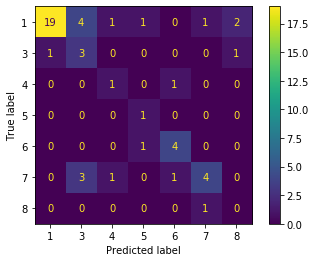

In [69]:

# {'C': 5, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 0.1, 'kernel': 'rbf'}
    
print("Support Vector Machines")
clf = benchmark1("SVM",SVC(C=30, kernel='rbf',gamma=0.1,class_weight="balanced",decision_function_shape="ovo",degree=5),x_train_minor_df,y_train_minor,x_test_minor_df,y_test_minor)

### Minority Random Forest

In [72]:
def rf_hyperparameter_tuning(X_train,y_train):
    print("RandomForest for predicting rating")   

    # Set the parameters by cross-validation

    tuned_parameters = [{'n_estimators': [200,250,300,350], 'criterion':["gini","entropy"],'max_features':["sqrt", "log2"],
                        'min_samples_leaf':[1,2,3],'n_jobs':[-1]}
                   ]
    scores = ['f1_weighted','recall_weighted']
    
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
    
        clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,n_jobs=-1,return_train_score = True,
                           scoring='%s' % score)
        clf.fit(X_train, y_train)
    
        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means_test = clf.cv_results_['mean_test_score']
        stds_test = clf.cv_results_['std_test_score']
        means_train = clf.cv_results_['mean_train_score']
        stds_train = clf.cv_results_['std_train_score']
        for mean_train, std_train,mean_test,std_test, params in zip(means_train,stds_train,means_test, stds_test, clf.cv_results_['params']):
            print("Train scores %0.3f (+/-%0.03f) Test scores %0.3f (+/-%0.03f) for %r"
                  % (mean_train, std_train * 2, mean_test, std_test * 2, params))
        print()
        print()
        
rf_hyperparameter_tuning(x_train_minor_df,y_train_minor)

RandomForest for predicting rating
# Tuning hyper-parameters for f1_weighted



D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350, 'n_jobs': -1}

Grid scores on development set:

Train scores 1.000 (+/-0.000) Test scores 0.606 (+/-0.143) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.625 (+/-0.107) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 250, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.614 (+/-0.126) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.629 (+/-0.076) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350, 'n_jobs': -1}
Train scores 0.991 (+/-0.011) Test scores 0.604 (+/-0.102) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators':

D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Best parameters set found on development set:

{'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350, 'n_jobs': -1}

Grid scores on development set:

Train scores 1.000 (+/-0.000) Test scores 0.676 (+/-0.104) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.689 (+/-0.117) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 250, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.683 (+/-0.081) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.695 (+/-0.086) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 350, 'n_jobs': -1}
Train scores 1.000 (+/-0.000) Test scores 0.676 (+/-0.073) for {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators':

RandomForest Classification
________________________________________________________________________________
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
Predictions
[7 1 1 7 7 1 7 1 7 7 1 7 1 1 1 6 6 1 1 1 1 1 1 1 6 1 6 4 6 1 3 7 7 1 1 5 1
 1 1 1 1 7 3 6 1 7 1 1 5 7 1]
Train accuracy:   1.00000
Test accuracy:   0.66667
Train recall:   1.00000
Test recall:   0.66667
Cohen kappa score:   0.47928
F1 Score: 0.64740
classification report:
              precision    recall  f1-score   support

      

D:\Softwares\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


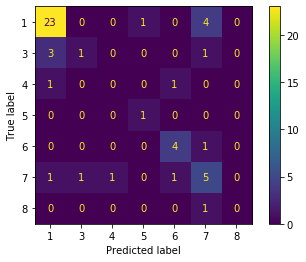

In [55]:

# {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200, 'n_jobs': -1}
    
print("RandomForest Classification")
clf = benchmark1("RF",RandomForestClassifier(min_samples_leaf=1, criterion='gini',n_estimators=350,max_features="sqrt",n_jobs=-1),x_train_minor_df,y_train_minor,x_test_minor_df,y_test_minor)




## Combination of binary and minority

In [70]:
y_predict

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2])

In [71]:
len(y_predict)

249

In [72]:
y_predict_minor = clf.predict(x_test_minor_df)

In [73]:
# y_predict_normal = clf_normal.predict(df2)

In [74]:
count = 0
for i in range (0,test_rowcount):
    if y_predict[i] != 1 and y_test_1[i] == 1:
        
        count = count + 1
    if y_predict[i] == 1 and y_test_1[i] == 1:
        y_predict[i] = y_predict_minor[count]
        count = count + 1
        

In [75]:
print (y_predict,y_test_1)

[2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 1 1 2 1 2 1 2 2 1 1 2 2
 1 9 2 1 1 2 7 2 2 1 3 2 2 2 1 2 2 2 2 2 1 2 2 2 1 3 1 2 1 2 1 2 2 2 1 2 2
 1 2 1 2 1 2 2 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1 1 2 3 3 2 2 2 2 2 7 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 2 1 2 2 2 2 4 1 1 1 2 2 1 2 3 2 2 1 2 2 2 2 2 2 2
 1 2 3 2 9 2 1 2 1 2 1 1 1 3 2 2 1 2 2 2 1 1 1 1 2 2 1 2 2 1 1 2 2 2 1 2 2
 2 2 2 1 2 1 1 3 1 2 1 2 2 1 2 2 2 2 2 2 4 1 2 2 2 2 2 1 2 2 2 3 2 1 2 2 2
 1 1 1 2 2 2 1 2 1 2 2 3 2 2 1 1 2 2 2 1 2 2 7 1 2 1 2] [2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2

In [76]:
count = 0
for i in range (0,test_rowcount):
    if y_predict[i]==1 and y_test_1[i]==1:
        count = count +1
print (count)

19


In [77]:
len(y_predict)

249

In [78]:
print(metrics.f1_score(y_test,y_predict,average='weighted'))

0.708719122299253


In [79]:
cm = metrics.confusion_matrix(y_test, y_predict)

Text(33.0, 0.5, 'true')

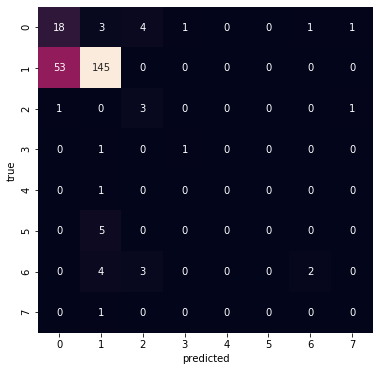

In [80]:
import seaborn as sns
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.xlabel("predicted")
plt.ylabel("true")